# Creating a figure using Plotly

In this example, we'll use Plotly to quickly create *"beautiful interactive web-based visualizations"* (as stated on their website).

## Installing Plotly

basically the two packages you need to install to be able to use Plotly in your jupyter notebook are <em>plotly</em> and <em>ipywidgets</em>:

In [1]:
#!pip install plotly ipywidgets

In [2]:
#!conda install -c plotly plotly ipywidgets

you can refer to https://plotly.com/python/getting-started/#initialization-for-offline-plotting%C3%A7 for more details.

Once Plotly is properly installed and integrated with jupyter lab, the following code block should generate a simple line graph:

## PACKAGES 

In [54]:
# importing packages
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

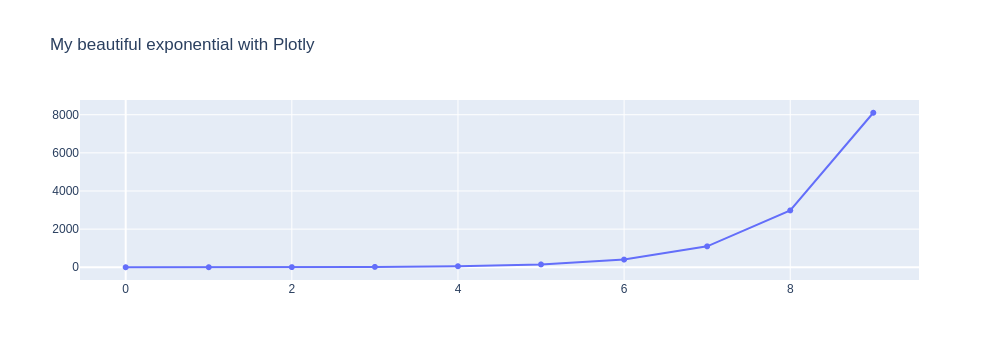

In [2]:
import plotly.graph_objects as go
import numpy as np

x = np.arange(10)
y = np.exp(x)

figure = go.FigureWidget()
figure.add_scatter(x=x, y=y);
figure.layout.title = 'My beautiful exponential with Plotly'

figure.show()

If this isn't the case, go through the more detailed installation procedure available here:  
https://plotly.com/python/getting-started/#initialization-for-offline-plottingç  
A possible source of error could be that Node isn't installed on your system:
```bash
apt install node # on Ubuntu
```

# Start by creating a figure that answers a _single_ question

<H4>
    <font color='orange'><b> --> How does the national energy consumption evolve with the change in temperature? </b></font>
</H4>

# Importing and preparing the data

## Import the data

First download the "Pickles" folder from google drive (*.../Modules/DataViz/DataViz3/Pickles)* and unzip its content in a new folder. There should be a total of 5 pickles in the folder:

In [7]:
# path_to_pickles = './Pickles'

# !ls -lh $path_to_pickles/*
# # you can also use the 'du' command (stands for 'disk usage'):
# # !du -h $path_to_pickles/*

ls: cannot access './Pickles/*': No such file or directory


In [7]:
# importing pickles 
df_nat = pd.read_pickle('../Pickles/df_data_nationales.pkl')
df_reg = pd.read_pickle('../Pickles/df_data_regionales.pkl')
df_eol = pd.read_pickle('../Pickles/df_eolien_norm.pkl')
df_sol = pd.read_pickle('../Pickles/df_solaire_norm.pkl')
df_temp = pd.read_pickle('../Pickles/df_temperatures.pkl')

In [22]:
# seeing data structure 
print(df_nat.shape)

(245472, 11)


In [23]:
df_nat

Consommation  Fioul  Charbon     Gaz  Nucléaire  Eolien  \
DateTime                                                                       
2012-01-01 00:00:00       58315.0  492.0     25.0  3816.0    52697.0  3588.0   
2012-01-01 00:15:00           NaN    NaN      NaN     NaN        NaN     NaN   
2012-01-01 00:30:00       58315.0  492.0     25.0  3816.0    52697.0  3588.0   
2012-01-01 00:45:00           NaN    NaN      NaN     NaN        NaN     NaN   
2012-01-01 01:00:00       56231.0  492.0     25.0  3834.0    51747.0  3536.0   
...                           ...    ...      ...     ...        ...     ...   
2018-12-31 22:45:00           NaN    NaN      NaN     NaN        NaN     NaN   
2018-12-31 23:00:00       63977.0  146.0     11.0  3910.0    55589.0  1537.0   
2018-12-31 23:15:00           NaN    NaN      NaN     NaN        NaN     NaN   
2018-12-31 23:30:00       63803.0  146.0     12.0  3452.0    55404.0  1543.0   
2018-12-31 23:45:00           NaN    NaN      NaN     NaN        NaN     NaN   

                     Solaire  Hydraulique  Pompage  Bioénergies  \
DateTime                                                          
2012-01-01 00:00:00      0.0       7922.0  -1139.0        719.0   
2012-01-01 00:15:00      NaN          NaN      NaN          NaN   
2012-01-01 00:30:00      0.0       7922.0  -1139.0        719.0   
2012-01-01 00:45:00      NaN          NaN      NaN          NaN   
2012-01-01 01:00:00      0.0       7598.0  -1730.0        721.0   
...                      ...          ...      ...          ...   
2018-12-31 22:45:00      NaN          NaN      NaN          NaN   
2018-12-31 23:00:00     -2.0       5148.0  -1364.0       1172.0   
2018-12-31 23:15:00      NaN          NaN      NaN          NaN   
2018-12-31 23:30:00     -2.0       4688.0  -1474.0       1166.0   
2018-12-31 23:45:00      NaN          NaN      NaN          NaN   

                     Ech. physiques  
DateTime                             
2012-01-01 00:00:00         -9806.0  
2012-01-01 00:15:00             NaN  
2012-01-01 00:30:00         -9806.0  
2012-01-01 00:45:00             NaN  
2012-01-01 01:00:00         -9993.0  
...                             ...  
2018-12-31 22:45:00             NaN  
2018-12-31 23:00:00         -2171.0  
2018-12-31 23:15:00             NaN  
2018-12-31 23:30:00         -1133.0  
2018-12-31 23:45:00             NaN  

[245472 rows x 11 columns]

In [21]:
df_nat.index

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:15:00',
               '2012-01-01 00:30:00', '2012-01-01 00:45:00',
               '2012-01-01 01:00:00', '2012-01-01 01:15:00',
               '2012-01-01 01:30:00', '2012-01-01 01:45:00',
               '2012-01-01 02:00:00', '2012-01-01 02:15:00',
               ...
               '2018-12-31 21:30:00', '2018-12-31 21:45:00',
               '2018-12-31 22:00:00', '2018-12-31 22:15:00',
               '2018-12-31 22:30:00', '2018-12-31 22:45:00',
               '2018-12-31 23:00:00', '2018-12-31 23:15:00',
               '2018-12-31 23:30:00', '2018-12-31 23:45:00'],
              dtype='datetime64[ns]', name='DateTime', length=245472, freq=None)

Import the relevant pickles into pandas dataframes:

Data importation step: done.

## Prepare the data

### Retreive the information about the evolution of the national energy consumption in France

keep only the column "Consommation" and downsample to hourly data (instead of every 15 min):

In [ ]:
df_nat_cons = df_nat.pop('Consommation')

In [61]:
df_nat_cons = pd.DataFrame(df_nat_cons)

df_nat_cons_temp

Consommation  Auvergne-Rhône-Alpes  \
2013-01-01 23:00:00       61449.0                  5.75   
2013-01-02 00:00:00       60074.0                  5.30   
2013-01-02 01:00:00       55985.0                  4.90   
2013-01-02 02:00:00       55736.0                  4.60   
2013-01-02 03:00:00       53626.0                  4.30   
...                           ...                   ...   
2018-01-18 18:00:00       72776.0                  9.15   
2018-01-18 19:00:00       76643.0                  9.05   
2018-01-18 20:00:00       74041.0                  9.05   
2018-01-18 21:00:00       69373.0                  9.00   
2018-01-18 22:00:00       65664.0                  8.85   

                     Bourgogne-Franche-Comté  Bretagne  Centre-Val de Loire  \
2013-01-01 23:00:00                     3.55  6.400000                 3.55   
2013-01-02 00:00:00                     2.95  6.366667                 3.25   
2013-01-02 01:00:00                     2.35  6.300000                 3.10   
2013-01-02 02:00:00                     1.85  5.966667                 3.15   
2013-01-02 03:00:00                     1.50  5.833333                 3.00   
...                                      ...       ...                  ...   
2018-01-18 18:00:00                     9.25  7.800000                10.30   
2018-01-18 19:00:00                     9.05  7.266667                 9.80   
2018-01-18 20:00:00                     8.65  6.833333                 9.20   
2018-01-18 21:00:00                     8.15  6.466667                 8.55   
2018-01-18 22:00:00                     7.80  6.233333                 7.85   

                     Grand-Est  Hauts-de-France  Ile-de-France  Normandie  \
2013-01-01 23:00:00       4.78             4.50           3.54        4.6   
2013-01-02 00:00:00       4.42             4.60           3.38        4.8   
2013-01-02 01:00:00       4.06             4.75           3.34        5.0   
2013-01-02 02:00:00       3.74             4.80           3.44        5.2   
2013-01-02 03:00:00       3.40             4.90           3.46        5.3   
...                        ...              ...            ...        ...   
2018-01-18 18:00:00       7.84             7.20           7.54        7.5   
2018-01-18 19:00:00       7.40             6.70           7.16        6.9   
2018-01-18 20:00:00       6.98             6.25           6.86        6.4   
2018-01-18 21:00:00       6.62             5.85           6.50        6.1   
2018-01-18 22:00:00       6.38             5.45           6.08        6.0   

                     Nouvelle-Aquitaine  Occitanie    PACA  Pays-de-la-Loire  
2013-01-01 23:00:00                 5.0   5.933333   6.750              4.45  
2013-01-02 00:00:00                 5.1   5.600000   6.425              4.10  
2013-01-02 01:00:00                 5.3   5.400000   6.150              3.95  
2013-01-02 02:00:00                 5.4   5.283333   5.875              3.90  
2013-01-02 03:00:00                 5.3   5.316667   5.600              3.75  
...                                 ...        ...     ...               ...  
2018-01-18 18:00:00                11.5   9.700000  10.425              8.15  
2018-01-18 19:00:00                11.5   9.333333  10.000              7.10  
2018-01-18 20:00:00                11.5   9.383333   9.800              6.40  
2018-01-18 21:00:00                11.4   9.416667   9.650              5.80  
2018-01-18 22:00:00                11.3   9.433333   9.325              5.50  

[44124 rows x 13 columns]

### Retreive the information about the evolution of the average temperature in France

Average out the temperature over the different regions and resample to hourly data:

In [45]:
# Joining df_nat_cons et df_temp 
df_nat_cons_temp = df_nat_cons.join(df_temp).dropna()

<AxesSubplot:>

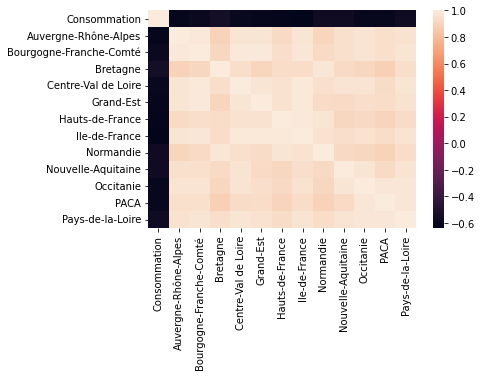

In [51]:
sns.heatmap(df_nat_cons_temp.corr())

In [63]:
# Créating X and Y 
X_cons_temp = df_nat_cons_temp.drop('Consommation', axis=1)
y_cons_temp = df_nat_cons_temp['Consommation']

In [67]:
# creating regions temperature mean column
df_nat_cons_temp['temp_nat_mean'] = X_cons_temp.mean(axis=1)

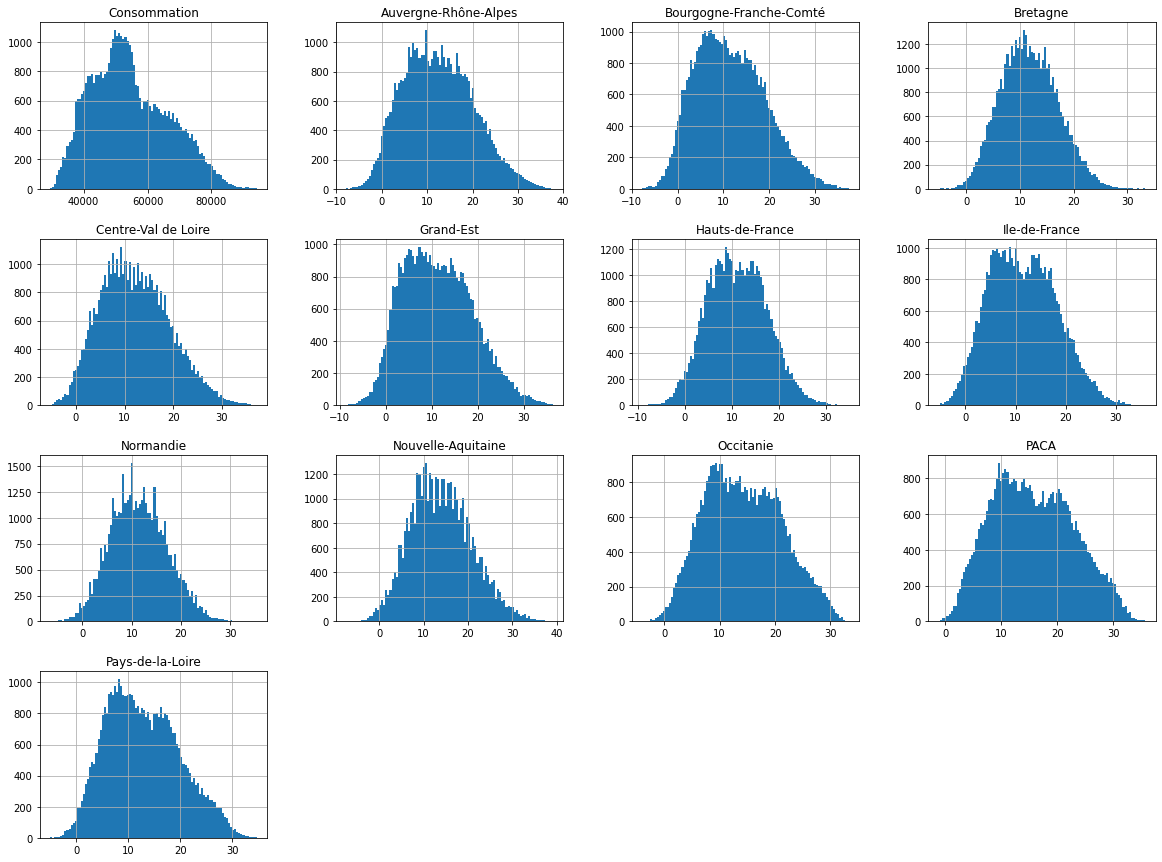

In [59]:
# plt.figure(figsize=(20,15))
fig1 = df_nat_cons_temp.hist(figsize=(20,15), bins=100);
# plt.fig1()
# plt.show()

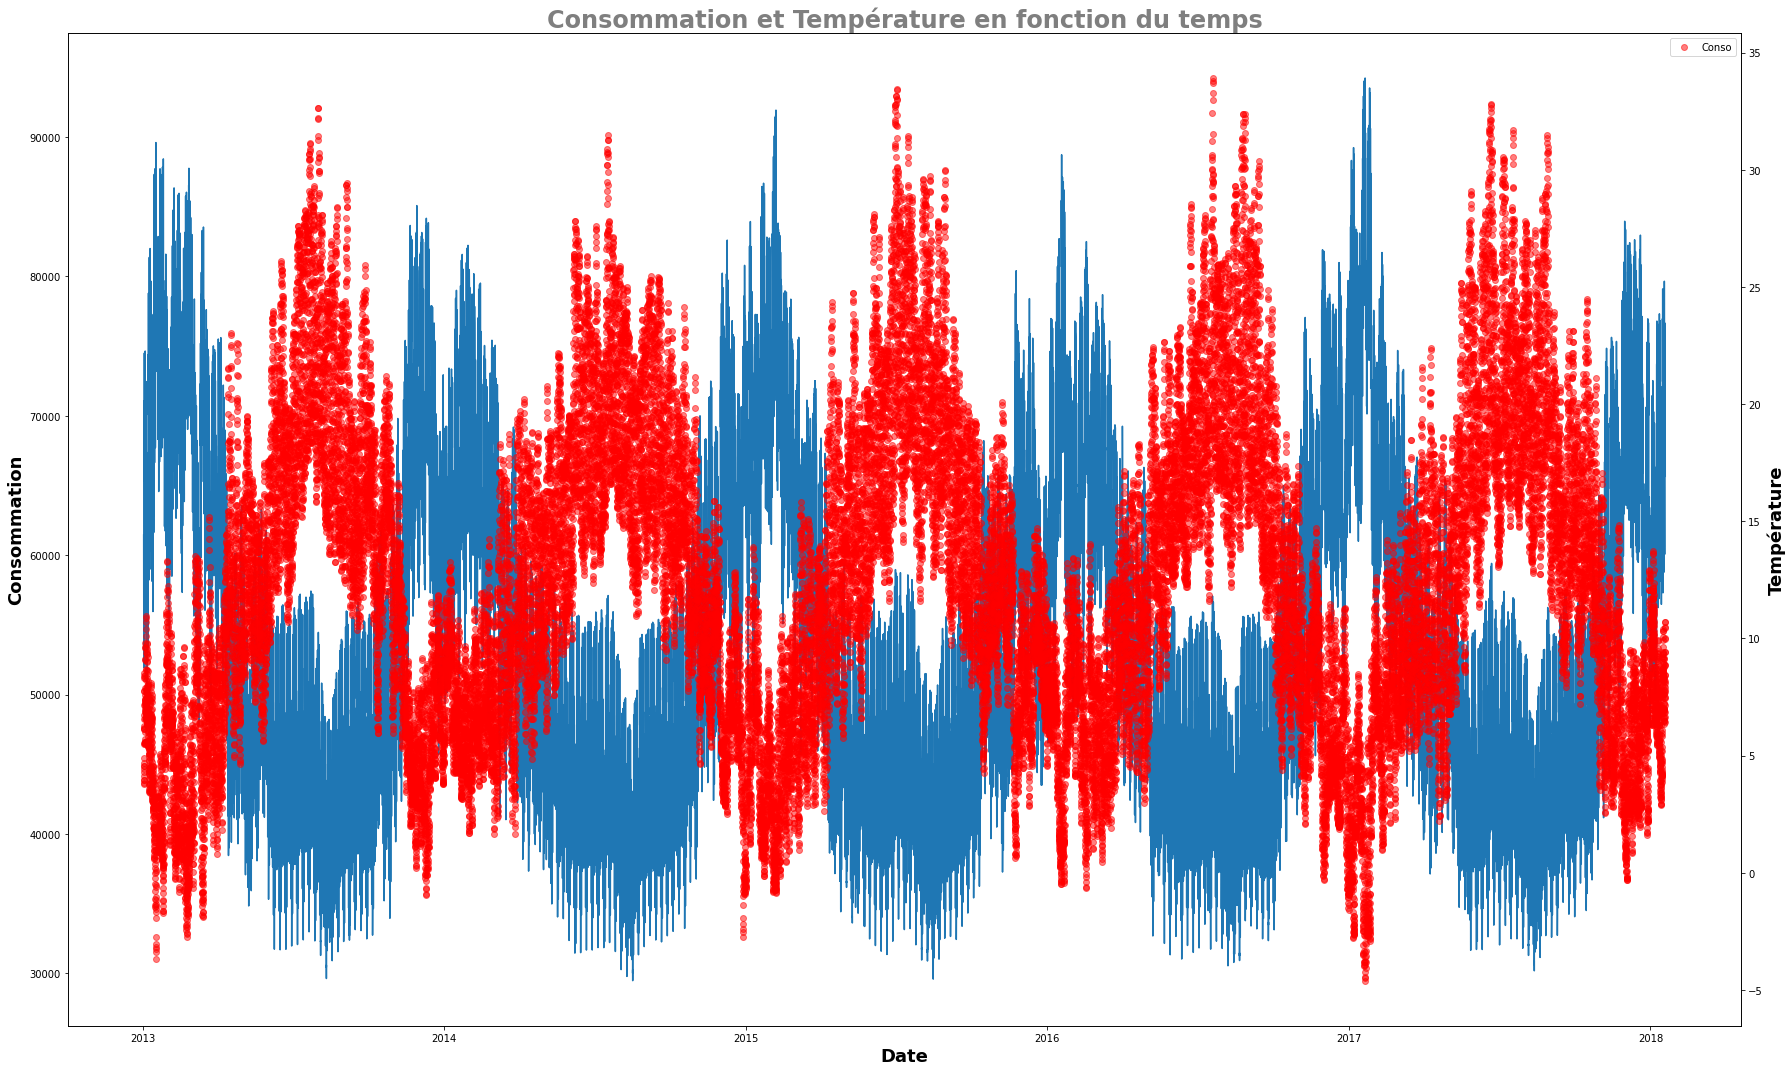

In [71]:
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot()


ax.plot(df_nat_cons_temp.index, df_nat_cons_temp['Consommation'])
ax.set_title("Consommation et Température en fonction du temps", fontsize=24, fontweight="bold", alpha=0.5)
ax.set_xlabel("Date", fontweight="bold", size =18)
ax.set_ylabel("Consommation", fontweight="bold", size = 18)

ax_2 = ax.twinx()
ax_2.scatter(df_nat_cons_temp.index, df_nat_cons_temp['temp_nat_mean'], color='red', alpha=0.5)
ax_2.set_xlabel("Date", fontweight="bold", size =18)
ax_2.set_ylabel("Température", fontweight="bold", size = 18)


plt.legend(['Conso', 'temp'])
fig.tight_layout()
plt.show();

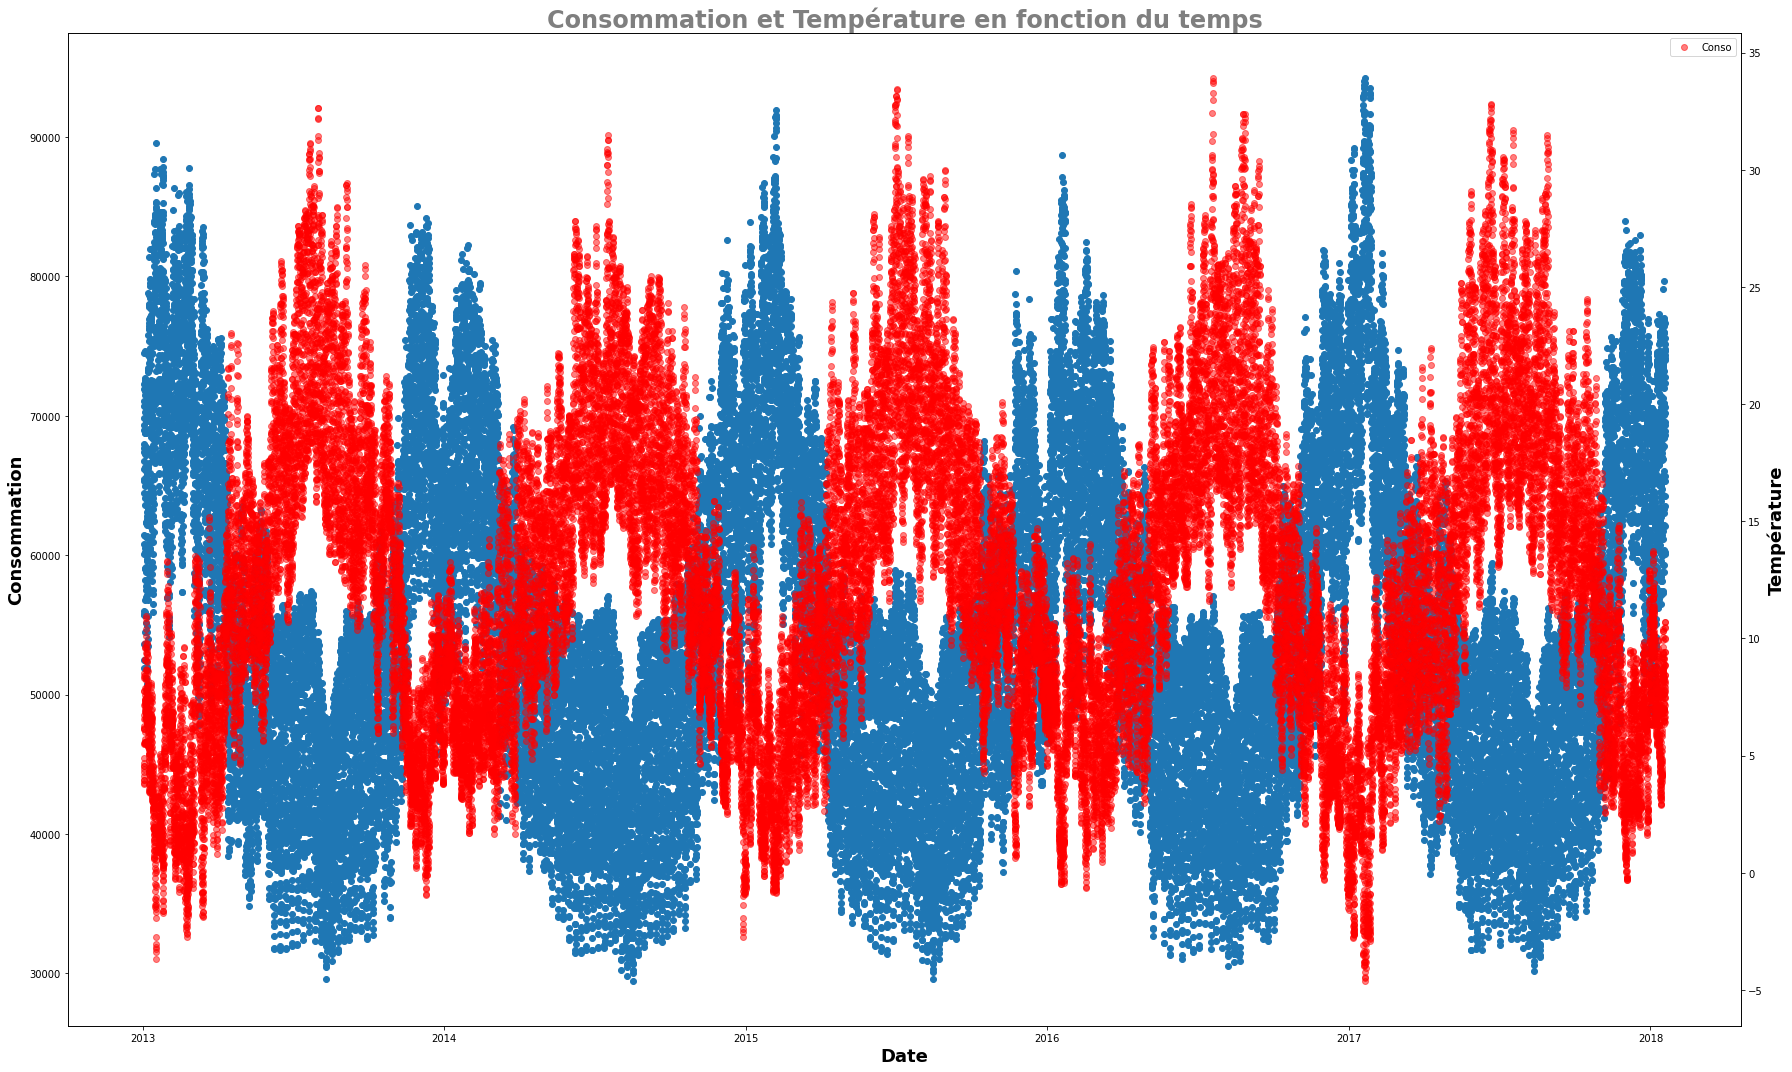

In [68]:
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot()


ax.scatter(x= df_nat_cons_temp.index, y= df_nat_cons_temp['Consommation'])
ax.set_title("Consommation et Température en fonction du temps", fontsize=24, fontweight="bold", alpha=0.5)
ax.set_xlabel("Date", fontweight="bold", size =18)
ax.set_ylabel("Consommation", fontweight="bold", size = 18)

ax_2 = ax.twinx()
ax_2.scatter(x= df_nat_cons_temp.index, y= df_nat_cons_temp['temp_nat_mean'], color='red', alpha=0.5)
ax_2.set_xlabel("Date", fontweight="bold", size =18)
ax_2.set_ylabel("Température", fontweight="bold", size = 18)


plt.legend(['Conso', 'temp'])
fig.tight_layout()
plt.show();

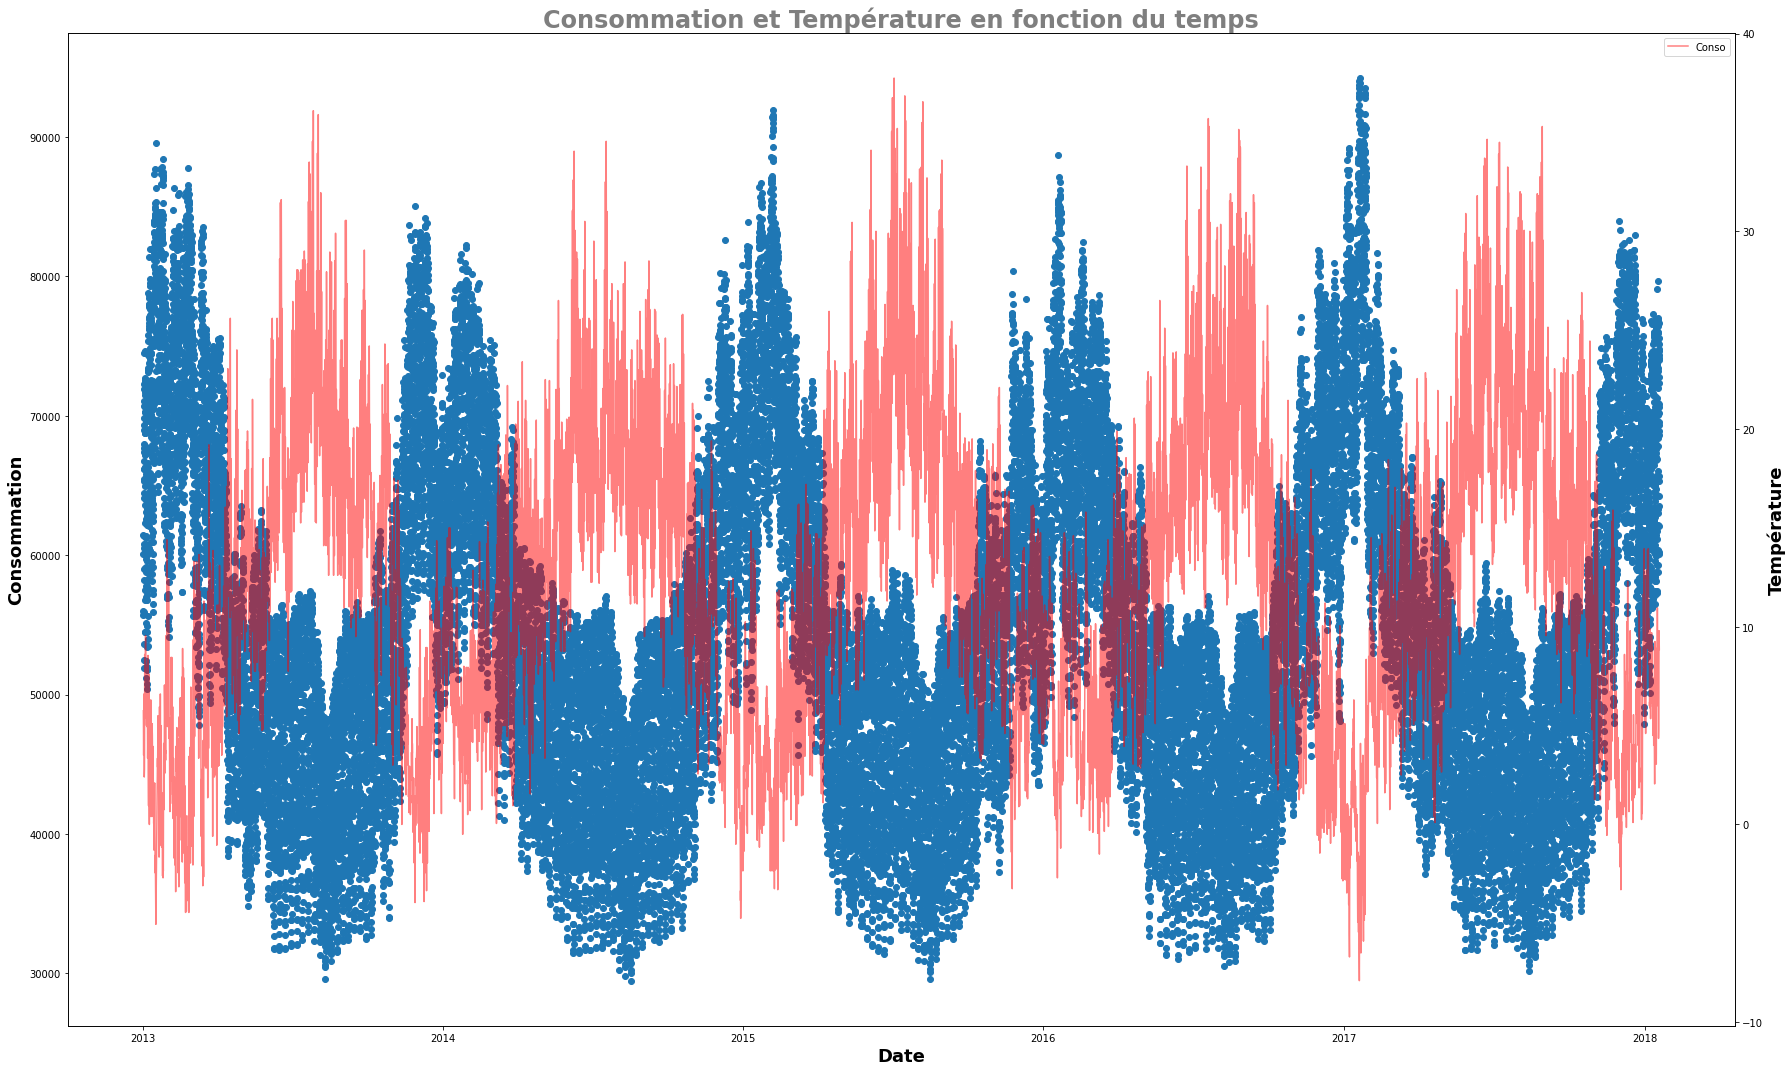

In [73]:
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot()


ax.scatter(x= df_nat_cons_temp.index, y= df_nat_cons_temp['Consommation'])
ax.set_title("Consommation et Température en fonction du temps", fontsize=24, fontweight="bold", alpha=0.5)
ax.set_xlabel("Date", fontweight="bold", size =18)
ax.set_ylabel("Consommation", fontweight="bold", size = 18)

ax_2 = ax.twinx()
ax_2.plot(df_nat_cons_temp.index, df_nat_cons_temp['Auvergne-Rhône-Alpes'], color='red', alpha=0.5)
ax_2.set_xlabel("Date", fontweight="bold", size =18)
ax_2.set_ylabel("Température", fontweight="bold", size = 18)


plt.legend(['Conso', 'temp'])
fig.tight_layout()
plt.show();

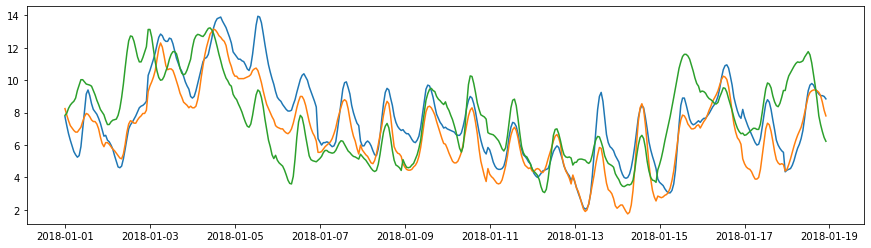

In [89]:
plt.figure(figsize=(15,4))
# plt.scatter(x= df_nat_cons_temp.index, y= df_nat_cons_temp['Consommation'])
# plt.plot(df_nat_cons_temp[["Consommation"]].loc['2018'])
plt.plot(df_nat_cons_temp[["Auvergne-Rhône-Alpes"]].loc['2018'])
plt.plot(df_nat_cons_temp[["Bourgogne-Franche-Comté"]].loc['2018'])
plt.plot(df_nat_cons_temp[["Bretagne"]].loc['2018'])

<AxesSubplot:>

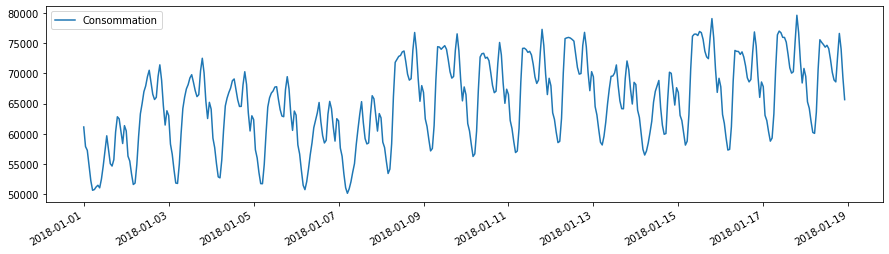

In [83]:
# df_nat_cons_temp[["Consommation","Auvergne-Rhône-Alpes"]].loc['2018'].plot(figsize=(15, 4))
df_nat_cons_temp[["Consommation"]].loc['2018'].plot(figsize=(15, 4))

### Merging the two dataframes together

Merging our two dataframes makes it easier to handle and save our data. the 'df.merge()' method also ensures each column has the same length (which makes plotting our data suddenly very simple).

Save our pre-processed data (used to answer question #1):

This concludes the data preparation step, let's see what we have until now:

... this figure can definitely use some improvements, now the work begins!

## Create a font dictionnary that will help you styling your figures

for example:

In [5]:
font = {
    'family': "Courier New",
    'size': {
        'small': 12,
        'medium': 16,
        'big': 26
        },
    'color': {
        'axes': 'rgb(180, 180, 180)',
        'primary': 'grey',
        'secondary': 'steelblue',
        'highlight': 'seagreen'
    },
    'line width': 2
}

Note: There are a loOot of named CSS colors you can pick from to customize your graph, but rememebr: don't pick too many! Three different colors is usually more than enough.  
FYI, these are the colors, play around with them:

*aliceblue, antiquewhite, aqua, aquamarine, azure,
beige, bisque, black, blanchedalmond, blue,
blueviolet, brown, burlywood, cadetblue,
chartreuse, chocolate, coral, cornflowerblue,
cornsilk, crimson, cyan, darkblue, darkcyan,
darkgoldenrod, darkgray, darkgrey, darkgreen,
darkkhaki, darkmagenta, darkolivegreen, darkorange,
darkorchid, darkred, darksalmon, darkseagreen,
darkslateblue, darkslategray, darkslategrey,
darkturquoise, darkviolet, deeppink, deepskyblue,
dimgray, dimgrey, dodgerblue, firebrick,
floralwhite, forestgreen, fuchsia, gainsboro,
ghostwhite, gold, goldenrod, gray, grey, green,
greenyellow, honeydew, hotpink, indianred, indigo,
ivory, khaki, lavender, lavenderblush, lawngreen,
lemonchiffon, lightblue, lightcoral, lightcyan,
lightgoldenrodyellow, lightgray, lightgrey,
lightgreen, lightpink, lightsalmon, lightseagreen,
lightskyblue, lightslategray, lightslategrey,
lightsteelblue, lightyellow, lime, limegreen,
linen, magenta, maroon, mediumaquamarine,
mediumblue, mediumorchid, mediumpurple,
mediumseagreen, mediumslateblue, mediumspringgreen,
mediumturquoise, mediumvioletred, midnightblue,
mintcream, mistyrose, moccasin, navajowhite, navy,
oldlace, olive, olivedrab, orange, orangered,
orchid, palegoldenrod, palegreen, paleturquoise,
palevioletred, papayawhip, peachpuff, peru, pink,
plum, powderblue, purple, red, rosybrown,
royalblue, rebeccapurple, saddlebrown, salmon,
sandybrown, seagreen, seashell, sienna, silver,
skyblue, slateblue, slategray, slategrey, snow,
springgreen, steelblue, tan, teal, thistle, tomato,
turquoise, violet, wheat, white, whitesmoke,
yellow, yellowgreen*

Once you settled on your styles, you can export this "style dictionnary" (for example as **style.json**) so it can be reused elsewhere in your project (or even in different projects). This will help you ensure style consistency throughout your plotting projects.

# Create a simple function that adds lineplots to a figure (in plotly these are called "traces")

The purpose of this function is to allow you to easily add extra 'traces' (for example lines) to your figure

# Create the actual figure

### Load our font dict

### Load our pre-processed data

Choose the data you want to plot and _how_ you want to plot it:

### Create a new figure and add the traces to it

Add even more traces:

Now add some annotations to the figure:  
https://plotly.com/python/reference/layout/annotations/https://plotly.com/python/reference/layout/annotations/

Add even more annotations!

Now make the figure beautiful (this can take a lot of time, but once it's done it's done!):